In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# show data
data=pd.read_csv("ex1data1.txt",header=None,names=["population","profit"])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
#describe data
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


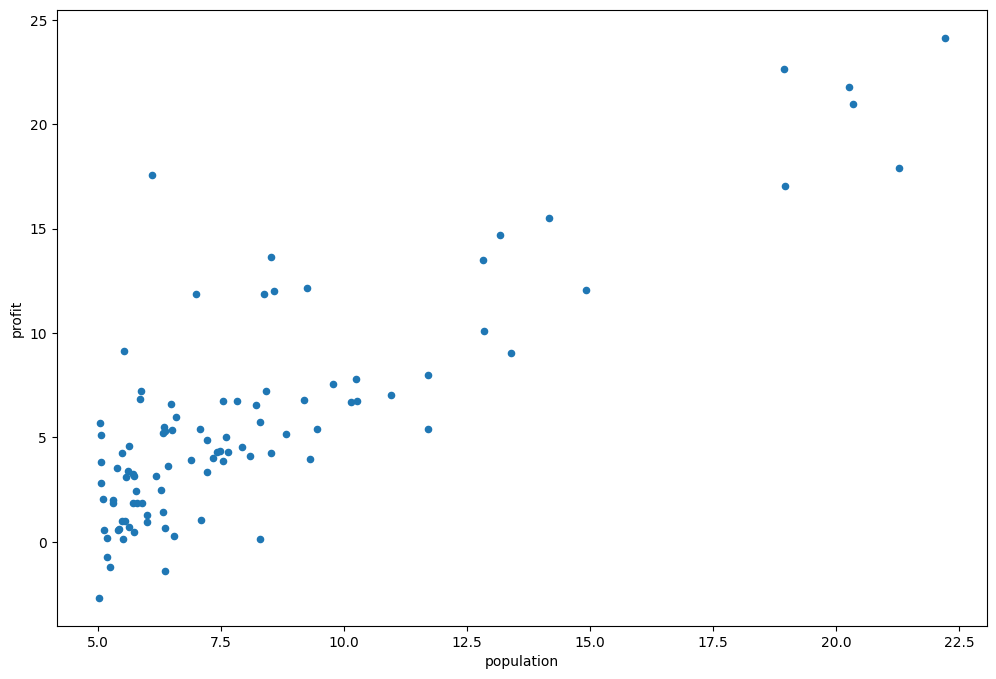

In [4]:
#draw scatter plot of training data
data.plot(kind="scatter",x="population",y="profit",figsize=(12,8))
plt.show()

In [5]:
#clean up dataset
data.insert(0,'ones',1)
cols=data.shape[1]
X=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]
X.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [6]:
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [7]:
#convert to matrix
X=np.matrix(X.values)
y=np.matrix(y.values)
theta=np.matrix([0,0])
theta

matrix([[0, 0]])

In [8]:
X.shape,y.shape,theta.shape

((97, 2), (97, 1), (1, 2))

In [9]:
#cost fuction
def computeCost(X,y,theta):
    inner=np.power((X*theta.T)-y,2)
    return np.sum(inner)/(2*len(X))

In [10]:
computeCost(X,y,theta)

32.072733877455676

In [11]:
#use gradient descent to find appropriate θ
def gradientDescent(X,y,theta,iters,alpha):
    parameters=theta.shape[1]
    temp=np.matrix(np.zeros(theta.shape))
    cost=np.zeros(iters)

    for i in range(iters):
        error=X*theta.T-y
        
        for j in range(parameters):
            term=np.multiply(X[:,j],error)
            temp[0,j]=theta[0,j]-((alpha/len(X))*np.sum(term))

        theta=temp
        cost[i]=computeCost(X,y,theta)
        
    return theta,cost

In [12]:
alpha=0.01
iters=3000

In [13]:
g,cost=gradientDescent(X,y,theta,iters,alpha)
g,cost

(matrix([[-3.87805118,  1.1912525 ]]),
 array([6.73719046, 5.93159357, 5.90115471, ..., 4.4770002 , 4.4770001 ,
        4.47699999]))

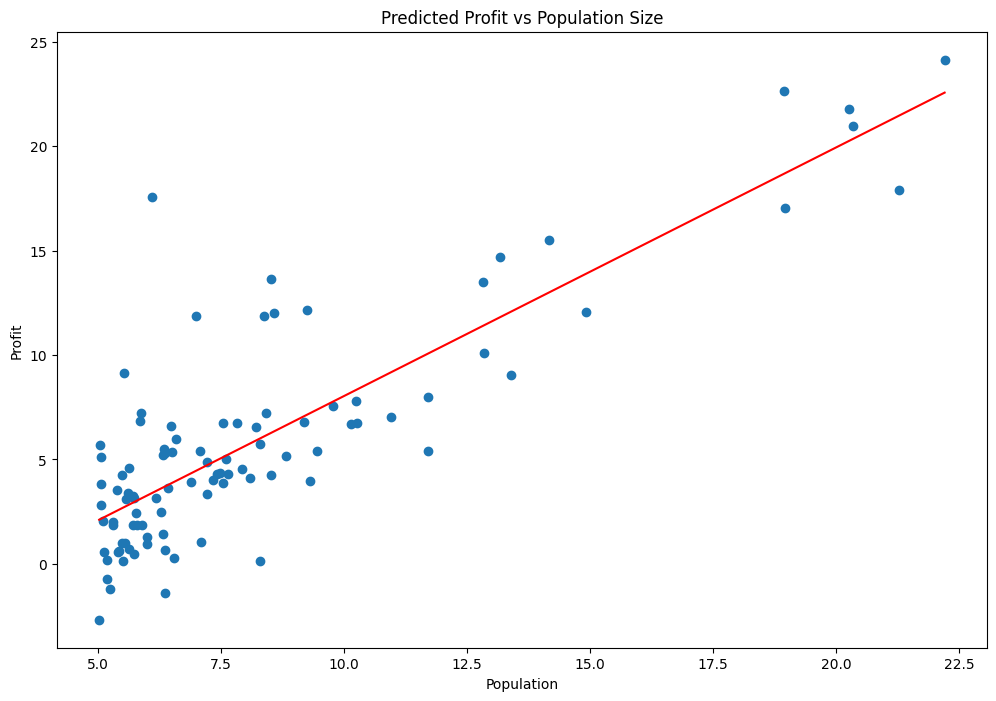

In [14]:
#plot figure
x=np.linspace(data.population.min(),data.population.max(),100)
f=g[0,0]+(g[0,1]*x)

fig,ax=plt.subplots(figsize=(12,8))
ax.plot(x,f,"r",label="Prediction")
ax.scatter(data.population,data.profit,label="training_data")
ax.set_xlabel("Population")
ax.set_ylabel("Profit")
ax.set_title("Predicted Profit vs Population Size")
plt.show()

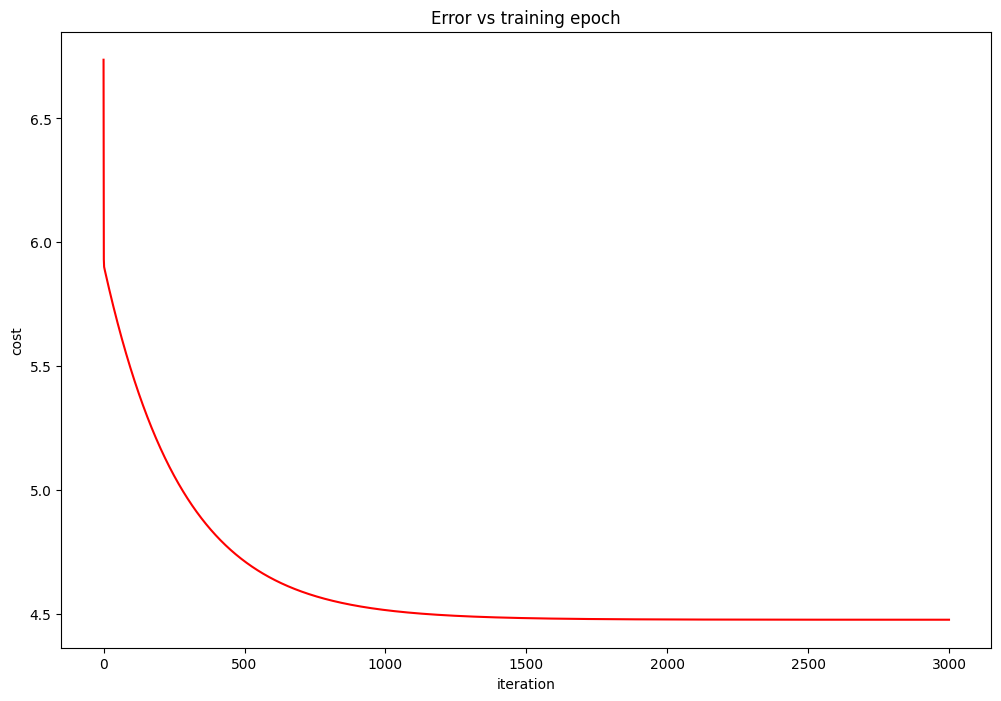

In [15]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,"r")
ax.set_xlabel("iteration")
ax.set_ylabel("cost")
ax.set_title("Error vs training epoch")
plt.show()

multiple variables dataset

In [16]:
path="ex1data2.txt"
data2=pd.read_csv(path,header=None,names=["Size","Bedroom","Prize"])
data2.head()

,Size,Bedroom,Prize
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [17]:
#multiple variables may need feature scaling
data2=(data2-data2.mean())/data2.std()
data2.head()

,Size,Bedroom,Prize
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [18]:
#preprocessing
data2.insert(0,"Ones",1)
cols=data2.shape[1]
X2=data2.iloc[:,0:cols-1]
y2=data2.iloc[:,cols-1:cols]
X2=np.matrix(X2.values)
y2=np.matrix(y2.values)
theta2=np.matrix(np.array([0,0,0]))

In [19]:
g2,cost2=gradientDescent(X2,y2,theta2,1000,0.1)
g2,cost2

(matrix([[-1.09486888e-16,  8.84765988e-01, -5.31788197e-02]]),
 array([0.40693147, 0.34617152, 0.30110291, 0.26742183, 0.24202804,
        0.22268634, 0.20778332, 0.19615275, 0.18695011, 0.17956245,
        0.17354364, 0.16856787, 0.1643961 , 0.16085209, 0.15780504,
        0.15515715, 0.15283462, 0.1507812 , 0.14895353, 0.14731772,
        0.14584693, 0.14451959, 0.14331811, 0.14222795, 0.14123687,
        0.14033451, 0.13951191, 0.13876131, 0.13807589, 0.13744961,
        0.13687711, 0.13635356, 0.13587464, 0.13543646, 0.13503547,
        0.13466846, 0.13433251, 0.13402498, 0.13374344, 0.13348567,
        0.13324967, 0.13303358, 0.13283572, 0.13265455, 0.13248866,
        0.13233675, 0.13219766, 0.13207029, 0.13195365, 0.13184685,
        0.13174905, 0.1316595 , 0.13157749, 0.1315024 , 0.13143363,
        0.13137066, 0.131313  , 0.1312602 , 0.13121184, 0.13116757,
        0.13112702, 0.13108989, 0.13105589, 0.13102476, 0.13099625,
        0.13097014, 0.13094623, 0.13092434, 0.130904

In [20]:
computeCost(X2,y2,g2)

0.13068648053904197

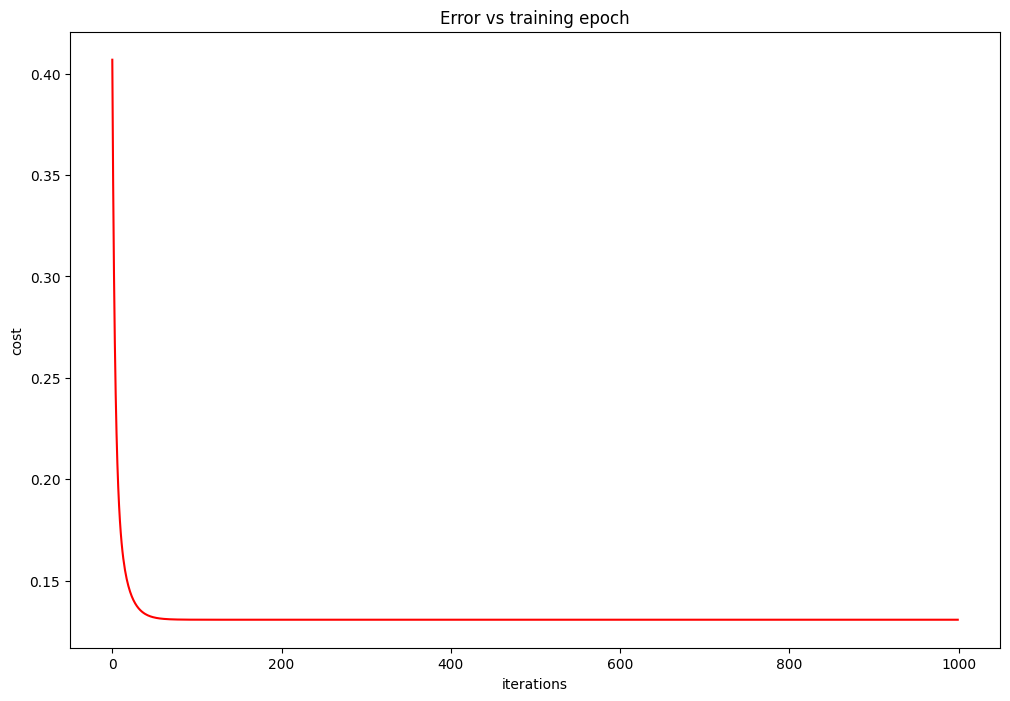

In [21]:
fg,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(1000),cost2,"r")
ax.set_xlabel("iterations")
ax.set_ylabel("cost")
ax.set_title("Error vs training epoch")
plt.show()

In [22]:
from sklearn import linear_model
model=linear_model.LinearRegression()

In [23]:
path="ex1data2.txt"
data3=pd.read_csv(path,header=None,names=["Size","Bedroom","Prize"])
data3.head()

,Size,Bedroom,Prize
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [24]:
# data3.insert(0,"Ones",1)
cols=data3.shape[1]
X3=data3.iloc[:,0:cols-1]
y3=data3.iloc[:,cols-1:cols]
X3=X3.values
y3=y3.values

In [25]:
model.fit(X3,y3)

LinearRegression()

normal function

In [26]:
def normalEqn(X,y):
    theta=np.linalg.inv(X.T@X)@X.T@y
    return theta

In [27]:
final_theta2=normalEqn(X2,y2)
final_theta2

matrix([[-1.04083409e-16],
        [ 8.84765988e-01],
        [-5.31788197e-02]])

In [29]:
computeCost(X2,y2,final_theta2.T)

0.130686480539042